# Handle imbalanced dataset
### Solution: By designing a cost function that is misclassifying the rare class over the rich class misclassifying, it is possible to design many generalized natural models that favor the rare class.
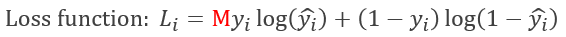



Class 1: 100 samples

Class 0: 349 samples

=> Choose M = 3.5

### Build new model with updated loss function 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

def Sigmoid(z):
    return 1.0/(1+np.exp(-z))
def Predict(x,w):
    z = np.dot(x, w)
    return Sigmoid(z)
def cost_function(features, labels, weights):
    n = len(labels)
    predictions = Predict(features, weights)
    cost_class1 = -np.log(predictions)*labels
    cost_class2 = -np.log(1-predictions)*(1-labels)
    cost = cost_class1 + 3.5*cost_class2
    return cost.sum()/n
def update_weight(features, labels, weights, learning_rate):
    n = len(labels)
    predictions = Predict(features, weights)
    gradient = np.dot(features.T,predictions+2.5*labels*predictions-3.5*labels)
    weights = weights - (gradient/n)*learning_rate
    return weights
def train(features, labels, weights, learning_rate, iter):
    cost_history = []
    for i in range(iter):
        weights = update_weight(features, labels, weights, learning_rate)
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
    return weights, cost_history
def Scale_data(data):
    data.age=scale(data.age)
    data.trestbps=scale(data.trestbps)
    data.chol=scale(data.chol)
    data.thalach=scale(data.thalach)
    data.oldpeak=scale(data.oldpeak)
    return data
def Predict_target(predictions):
    for i in range(len(predictions)):
        if predictions[i] >= 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0
    return predictions

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
positive = data.loc[data.target==1]
negative = data.loc[data.target==0]

In [5]:
pos_train = positive.sample(n=100)
neg_train = negative.sample(n=349)
data_train = pd.concat([neg_train, pos_train])
labels = data_train.target.to_numpy()
data_train["bias"]=np.ones(449)
data_train=data_train.drop(['target'], axis=1)

### Train model and predict

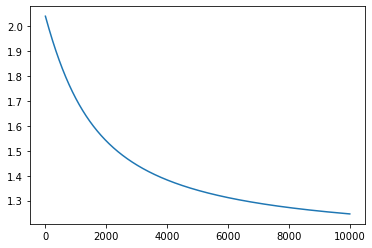

In [7]:
weights = np.zeros([14], float)
cost_history = []
weights, cost_history = train(Scale_data(data_train).to_numpy(), labels, weights, 0.0005, 10000)
plt.plot(cost_history)

[Text(0.5, 1.0, 'Predictions of data train')]

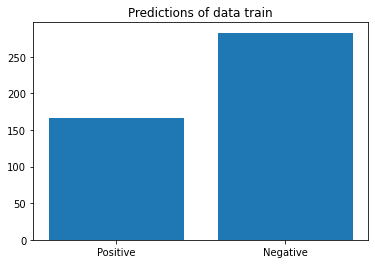

In [10]:
predictions = Predict(Scale_data(data_train).to_numpy(), weights)
predictions = Predict_target(predictions)
target_values = {"Positive": np.count_nonzero(predictions==1), "Negative": np.count_nonzero(predictions==0)}
fig, ax = plt.subplots()
ax.bar(target_values.keys(), target_values.values())
ax.set(title="Predictions of data train")

In [11]:
def Confusion_matrix(predictions, labels):
    True_Pos = True_Neg = False_Neg = False_Pos = 0
    for i in range(len(labels)):
        if predictions[i]==labels[i]==1:
            True_Pos+=1
        elif predictions[i]==1 and labels[i]==0:
            False_Pos+=1
        elif predictions[i]==0 and labels[i]==1:
            False_Neg+=1
        elif predictions[i]==labels[i]==0:
            True_Neg+=1
    return True_Pos, True_Neg, False_Neg, False_Pos
def Evaluation_metrics(True_Pos, True_Neg, False_Neg, False_Pos):
    accuracy =(True_Pos+True_Neg)/(True_Pos+ True_Neg+ False_Neg+ False_Pos)
    precision = True_Pos/(True_Pos+False_Pos)
    recall = True_Pos/(True_Pos+False_Neg)
    F1_score = (2*precision*recall)/(precision+recall)
    return accuracy, precision, recall, F1_score

In [12]:
data_test = data.drop(labels=data_train.index, axis = 0)
data_test["bias"]=np.ones(len(data_test))
labels_of_datatest = data_test.target.to_numpy()
data_test = data_test.drop(['target'], axis=1)
predictions_of_datatest = Predict(Scale_data(data_test).to_numpy(), weights)
predictions_of_datatest = Predict_target(predictions_of_datatest)

True_Pos_1, True_Neg_1, False_Neg_1, False_Pos_1 = Confusion_matrix(predictions, labels)
accuracy_1, precision_1, recall_1, F1_score_1 = Evaluation_metrics(True_Pos_1, True_Neg_1, False_Neg_1, False_Pos_1)

True_Pos_2, True_Neg_2, False_Neg_2, False_Pos_2 = Confusion_matrix(predictions_of_datatest, labels_of_datatest)
accuracy_2, precision_2, recall_2, F1_score_2 = Evaluation_metrics(True_Pos_2, True_Neg_2, False_Neg_2, False_Pos_2)

In [13]:
pos_test = positive.drop(labels=pos_train.index, axis =0)
neg_test = negative.drop(labels=neg_train.index, axis=0)

In [14]:
True_Pos_2, True_Neg_2, False_Neg_2, False_Pos_2

(319, 138, 107, 12)

In [15]:
n1_pos = len(pos_train)
n1_neg = len(neg_train)
n2_pos = len(pos_test)
n2_neg = len(neg_test)
Conf_matrix_2 = np.array([[round(True_Neg_2/n2_neg,2),round(False_Pos_2/n2_neg,2)],[round(False_Neg_2/n2_pos,2), round(True_Pos_2/n2_pos,2)]])
Conf_matrix_1 = np.array([[round(True_Neg_1/n1_neg,2),round(False_Pos_1/n1_neg,2)],[round(False_Neg_1/n1_pos,2), round(True_Pos_1/n1_pos,2)]])

In [16]:
def Visualize_confusion_matrix(Confusion_matrix):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(Confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(Confusion_matrix.shape[0]):
        for j in range(Confusion_matrix.shape[1]):
            ax.text(x=j, y=i,s=Confusion_matrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

### Evaluation metrics of data train

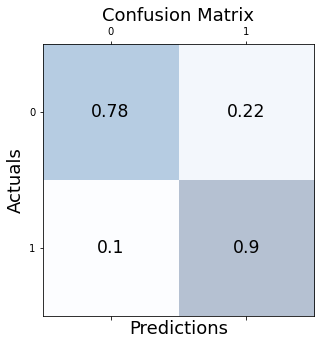

In [17]:
Visualize_confusion_matrix(Conf_matrix_1)

In [18]:
accuracy_1, precision_1, recall_1, F1_score_1

(0.8084632516703786, 0.5421686746987951, 0.9, 0.6766917293233082)

### Evaluation metrics of data test

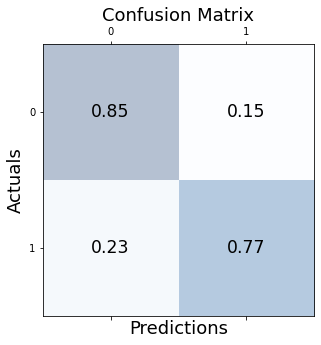

In [68]:
Visualize_confusion_matrix(Conf_matrix_2)

In [19]:
accuracy_2, precision_2, recall_2, F1_score_2 

(0.7934027777777778,
 0.9637462235649547,
 0.7488262910798122,
 0.8428005284015851)

### Conclusion:
F1_score increased by 47% from 0.37 to 0.84